# Исследование рынка общепита

**Цели проекта**

Подготовить исследование рынка Москвы за 2022 год по сегментам (кафе, ресторан, пиццерия, паб, бар). Определить оптимальные район, меню и цены для кофейни.

**План проекта**
1. Обзор и предобработка данных
2. Анализ данных
3. Кейс кофейня
4. Рекомендации

# Обзор и предобработка данных

In [1]:
import pandas as pd
import datetime as dt                               # для работы с датой 
import plotly.express as px
from plotly import graph_objects as go              # для визуализации данных
from folium import Map, Marker, Choropleth          # импортируем карту, маркер и хороплет
from folium.plugins import MarkerCluster            # импортируем кластер
from folium.features import CustomIcon              # импортируем собственные иконки
from IPython.display import IFrame


import warnings                                     # для предупреждений в программе 
warnings.filterwarnings('ignore')                   # игнорировать предупреждения

# с помощью pd.option настроим вывод так чтобы
pd.options.display.max_columns = None               # чтобы не обрезались колонки
pd.options.display.max_rows = None                  # чтобы видеть все содержимое вывода
pd.options.display.max_colwidth = -1                # текст в ячейке отражался полностью вне зависимости от длины;
pd.options.display.float_format = '{:.2f}'.format   # все числа отражались с двумя знаками после запятой.

In [2]:
data = pd.read_csv('/datasets/moscow_places.csv')

In [3]:
def info_df(dataframe):
    print("5 первых строк таблицы:")
    display(dataframe.head())
    print("Статистика данных:")
    display(dataframe.describe().T)
    display(dataframe.describe(include='object').T)
    print("Общая информация о данных:")
    dataframe.info()
    
info_df(data)

5 первых строк таблицы:


,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.88,37.49,5.00,NaN,Цена чашки капучино:155–185 ₽,NaN,170.00,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.45,5.00,средние,Средний счёт:400–600 ₽,500.00,NaN,1,148.00


Статистика данных:


,count,mean,std,min,25%,50%,75%,max
lat,8406.00,55.75,0.07,55.57,55.71,55.75,55.80,55.93
lng,8406.00,37.61,0.10,37.36,37.54,37.61,37.66,37.87
rating,8406.00,4.23,0.47,1.00,4.10,4.30,4.40,5.00
middle_avg_bill,3149.00,958.05,1009.73,0.00,375.00,750.00,1250.00,35000.00
middle_coffee_cup,535.00,174.72,88.95,60.00,124.50,169.00,225.00,1568.00
chain,8406.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
seats,4795.00,108.42,122.83,0.00,40.00,75.00,140.00,1288.00


,count,unique,top,freq
name,8406,5614,Кафе,189
category,8406,8,кафе,2378
address,8406,5753,"Москва, проспект Вернадского, 86В",28
district,8406,9,Центральный административный округ,2242
hours,7870,1307,"ежедневно, 10:00–22:00",759
price,3315,4,средние,2117
avg_bill,3816,897,Средний счёт:1000–1500 ₽,241


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Таблица содержит данные о 8406 точках питания в Москве.

Необходимо заменить тип данных в колонках `middle_avg_bill`, `middle_coffee_cup` и `seats` на *int* и разобраться с пропусками.

## Описание данных
`name` - название заведения;

`category` - вид деятельности ;

`address` - адрес;

`district` — административный район расположения;

`hours` - часы работы;

`lat` - координаты заведения на карте (широта);

`lng` - координаты заведения на карте (долгота);

`rating` - рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

`price` - категория цен в заведении, например «средние», «ниже среднего», «выше среднего»;

`avg_bill` - средний чек в виде диапазона;

`middle_avg_bill` - число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»;

`middle_coffee_cup` - число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»;

`chain` - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;

`seats` - число посадочных мест.

## Обработка пропусков

In [4]:
display('Количество пропусков в датафреме data', data.isna().sum())

'Количество пропусков в датафреме data'

name                 0   
category             0   
address              0   
district             0   
hours                536 
lat                  0   
lng                  0   
rating               0   
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                0   
seats                3611
dtype: int64

Пропуски в датафрейме заменить не получится, оставим все без изменений

## Обработка дубликатов

In [5]:
print('Явных дубликатов в датафреме data:', data.duplicated().sum())

Явных дубликатов в датафреме data: 0


## Обработка неявных дубликатов

In [6]:
data['name']=data['name'].str.lower()

data['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [7]:
print('Дубликатов по колонкам `name`, `address` до обработки:',data.duplicated(subset=['name','address']).sum())

Дубликатов по колонкам `name`, `address` до обработки: 3


In [8]:
data = data.drop_duplicates(subset=['name','address'])
print('Дубликатов по колонкам `name`, `address` после обработки:',data.duplicated(subset=['name','address']).sum())

Дубликатов по колонкам `name`, `address` после обработки: 0


Неявные дубликаты удалены

## Создание колонок

## `street`
Добавим колонку, где будет указана улица заведения

In [9]:
final = []                            # пустой список, куда добавим названия улиц

for i in list(data['address']):       # пройдемся циклом по адресам
    words = i.split(', ')             # разделим адреса по ', '
    final.append(words[1])            # добавляем второй элемент из words, где указана улица, в final
        
data['street'] = pd.Series(final)     # добавляем улицы в датафрейм

data.head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00,улица Дыбенко
2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00,Клязьминская улица


### `is_24/7`
Добавим колонку с обозначением, что заведение работает ежедневно и круглосуточно (24/7)

In [10]:
data.loc[data['hours']=="ежедневно, круглосуточно", 'is_24/7'] = 1    # ежедневным и круглосуточным заведениям присваиваем 1
data['is_24/7'] = data['is_24/7'].fillna(0)                       # остальным 0
data['is_24/7'] = data['is_24/7'].astype('int')

data.head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,0
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00,улица Дыбенко,0
2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00,Клязьминская улица,0


### `url`
Добавим колонку, где будет указан URL-адрес изображения по категориям

In [11]:
data.loc[(data['category']=='кафе') | (data['category']=='кофейня'),'url'] = 'https://img.icons8.com/?size=100&id=37211&format=png'
data.loc[data['category']=='ресторан','url'] = 'https://img.icons8.com/?size=160&id=j0OYwRn0d2aX&format=png'
data.loc[data['category']=='пиццерия','url'] = 'https://img.icons8.com/?size=100&id=1911&format=png'
data.loc[data['category']=='бар,паб','url'] = 'https://img.icons8.com/?size=100&id=4925&format=png'
data.loc[data['category']=='быстрое питание','url'] = 'https://img.icons8.com/?size=160&id=bI1LowN2fISM&format=png'
data.loc[data['category']=='булочная','url'] = 'https://img.icons8.com/?size=160&id=iA9qOyQRvv25&format=png'
data.loc[data['category']=='столовая','url'] = 'https://img.icons8.com/?size=100&id=10719&format=png'

data.head(3)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7,url
0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN,улица Дыбенко,0,https://img.icons8.com/?size=100&id=37211&format=png
1,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00,улица Дыбенко,0,https://img.icons8.com/?size=160&id=j0OYwRn0d2aX&format=png
2,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00,Клязьминская улица,0,https://img.icons8.com/?size=100&id=37211&format=png


## Выводы

+ В данных сожержится информация о 8406 заведениях Москвы;


+ Дубликатов не обнаружено, неявные дубликаты ликвидированы (3 шт). Пропуски в столбцах заменить нельзя;


+ Добавлены колонки `street`, `is_24/7` и `url`;


+ Данные **готовы** к анализу.

# Анализ данных

## Количество заведений по категориям

In [12]:
categories_number = data.groupby('category', as_index=False).agg({'name':'count'})\
                                                            .sort_values(by='name', ascending=False)\
                                                            .reset_index(drop=True)
categories_number.columns=['category','number']
categories_number

,category,number
0,кафе,2377
1,ресторан,2042
2,кофейня,1413
3,"бар,паб",764
4,пиццерия,633
5,быстрое питание,603
6,столовая,315
7,булочная,256


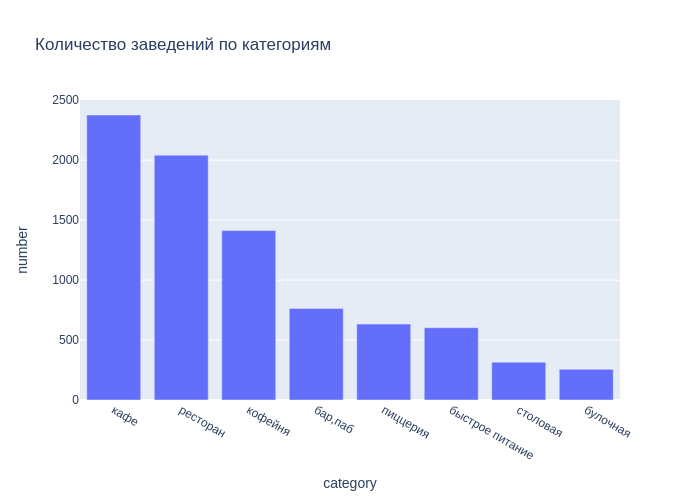

In [13]:
fig = px.bar(categories_number, x='category', y='number', title='Количество заведений по категориям')
fig.show('png')

Более всех среди общепитов распространены кафе, рестораны и кофейни. Менее всех - булочные, столовые и быстрое питание (fast-food)

## Количество посадочных мест в заведениях по категориям

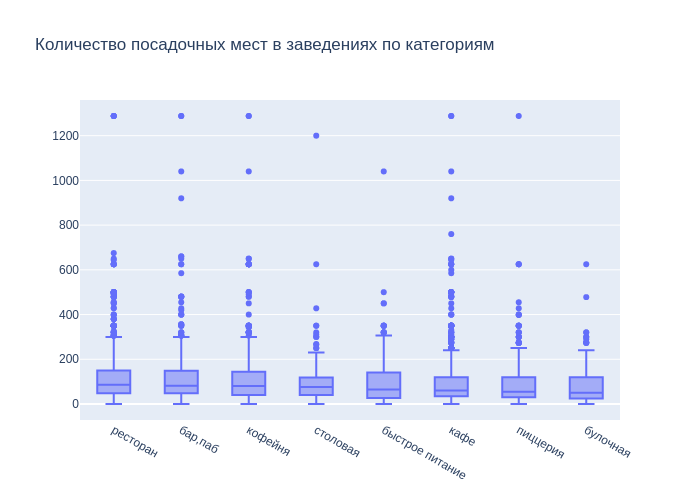

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(x=data['category'],y=data['seats']))
fig.update_layout(title='Количество посадочных мест в заведениях по категориям')

seats_median = data.groupby('category')['seats'].median().reset_index()         # вычисляем медиану для каждой категории
sorted_seats = seats_median.sort_values(by='seats', ascending=False)            # сортируем категории по уменьшению медианы
fig.update_xaxes(categoryorder='array', categoryarray=sorted_seats['category']) # обновляем порядок на графике

fig.show('png')

В среднем, меньше всего посадочных мест в булочных, пиццериях и кафе. Больше всего - в ресторанах, барах, пабах и кофейнях

##  Соотношение сетевых и несетевых заведений

In [15]:
chain_number = data.groupby('chain', as_index=False).agg({'name':'count'})
chain_number

,chain,name
0,0,5200
1,1,3203


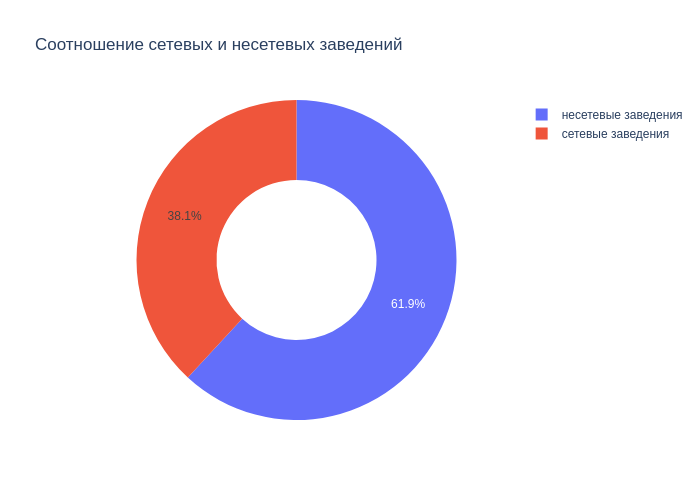

In [16]:
name_rest = ['несетевые заведения', 'сетевые заведения']
values = chain_number['name']

fig = go.Figure(data=[go.Pie(labels=name_rest, values=values, hole=0.5)])
fig.update_layout(title='Соотношение сетевых и несетевых заведений')
fig.show('png')

Доля несетевых заведений - 61.9%. Доля сетевых в 1.6 раза ниже

## Доля сетевых заведений по категориям

In [17]:
chain_share = data.groupby('category', as_index=False).agg({'name':'count','chain':'sum'})
chain_share['share, %'] = 100*chain_share['chain']/chain_share['name']
chain_share.columns=['category', 'number', 'chain', 'share, %']
chain_share = chain_share.sort_values(by='share, %').reset_index(drop=True)
chain_share

,category,number,chain,"share, %"
0,"бар,паб",764,168,21.99
1,столовая,315,88,27.94
2,кафе,2377,779,32.77
3,ресторан,2042,729,35.70
4,быстрое питание,603,232,38.47
5,кофейня,1413,720,50.96
6,пиццерия,633,330,52.13
7,булочная,256,157,61.33


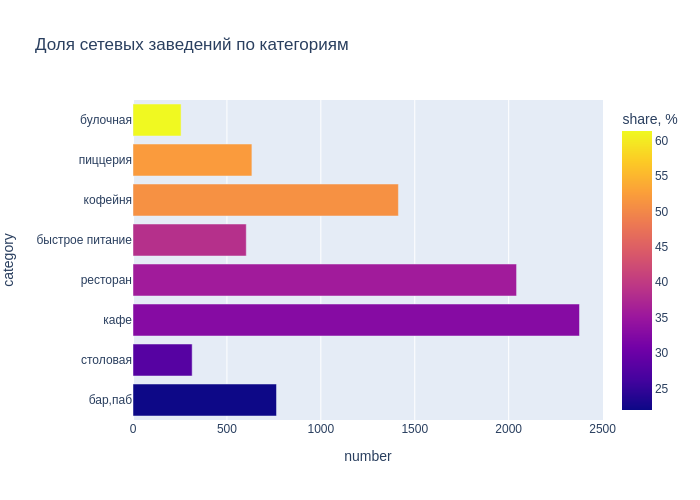

In [18]:
fig = px.bar(chain_share, x='number', y='category',color='share, %', title='Доля сетевых заведений по категориям')
fig.show('png')

Максимальная доля сетевых заведений в булочных - 60%. Также высокие доли у пиццерий и кофеен. 

Минимальная доля сетевых заведений у баров, пабов - 22%. Также низкие доли у столовых и кафе. 

## Топ-15 популярных сетей в Москве

In [19]:
top_fifteen = data.query('chain==1').groupby('name', as_index=False).agg({'address':'count'})\
                                                  .sort_values(by='address', ascending=False).reset_index(drop=True)
top_fifteen=top_fifteen.head(15)
top_fifteen.columns=['name','count']

top_fifteen

,name,count
0,шоколадница,120
1,домино'с пицца,76
2,додо пицца,74
3,one price coffee,71
4,яндекс лавка,69
5,cofix,65
6,prime,50
7,хинкальная,44
8,кофепорт,42
9,кулинарная лавка братьев караваевых,39


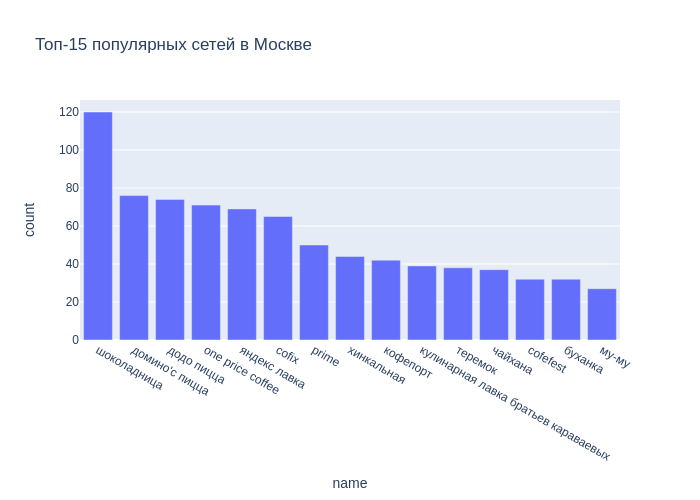

In [20]:
fig = px.bar(top_fifteen, x='name', y='count', title='Топ-15 популярных сетей в Москве')
fig.show('png')

Самые популярные сети общепита в Москве (топ-5): "Шоколадница", "Домино'с Пицца", "Додо Пицца", "One Price Coffee" и "Яндекс Лавка"; открыто более 70 точек

## Распределение категорий заведений по районам

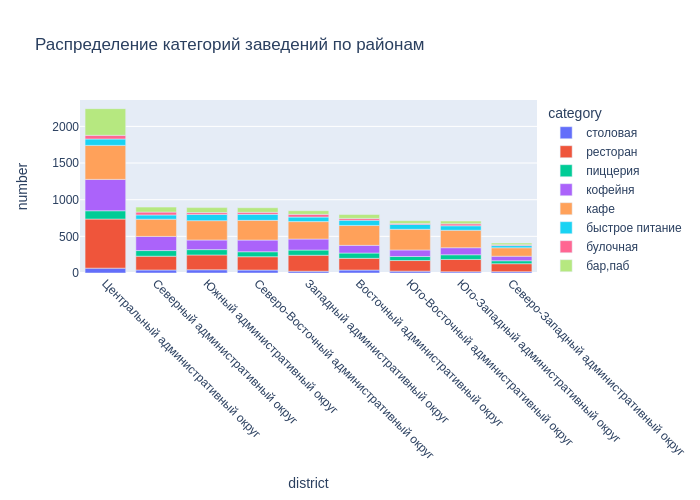

In [21]:
category_stat = data.groupby(['district','category'],as_index=False).agg({'name':'count'})
category_stat.columns = ['district', 'category', 'number']
category_stat=category_stat.sort_values(by='district', ascending=False)

fig = px.bar(category_stat, x='district', y='number', color='category', title='Распределение категорий заведений по районам')

number_stat = data.groupby('district').agg({'name':'count'}).reset_index()                      
sorted_number = number_stat.sort_values(by='name', ascending=False)                             
fig.update_xaxes(categoryorder='array', categoryarray=sorted_number['district'], tickangle=45)

fig.show('png')

Представлены 9 районов Москвы. Больше всего заведений находится в ЦАО. Меньше всего - в СЗАО

## Распределение рейтингов по категориям заведений

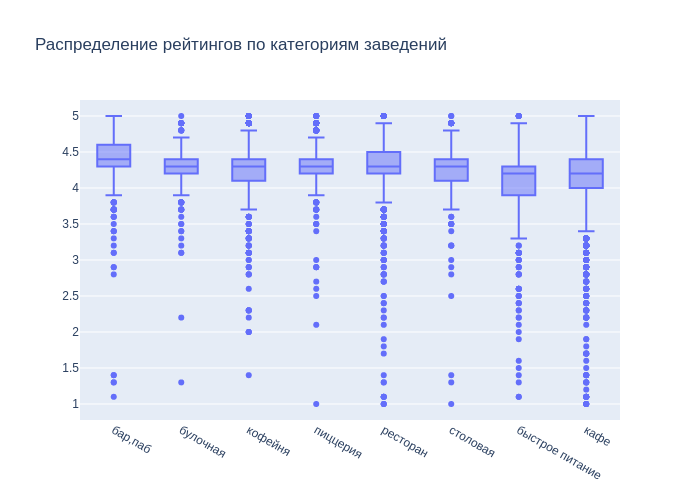

In [22]:
fig = go.Figure()
fig.add_trace(go.Box(x=data['category'],y=data['rating']))
fig.update_layout(title='Распределение рейтингов по категориям заведений')
rate_stat = data.groupby('category').agg({'rating':'median'}).reset_index()                      
sorted_rate = rate_stat.sort_values(by='rating', ascending=False)                             
fig.update_xaxes(categoryorder='array', categoryarray=sorted_rate['category'])
fig.show('png')

Средние рейтинги по категориям заведений находятся в диапазоне 4-4.5. Больше всего низких оценок ставят кафе и быстрому питанию.

## Хороплет со средним рейтингом заведений каждого района

In [23]:
rating_df = data.groupby('district', as_index=False)['rating'].agg('mean')
rating_df

,district,rating
0,Восточный административный округ,4.17
1,Западный административный округ,4.18
2,Северный административный округ,4.24
3,Северо-Восточный административный округ,4.15
4,Северо-Западный административный округ,4.21
5,Центральный административный округ,4.38
6,Юго-Восточный административный округ,4.10
7,Юго-Западный административный округ,4.17
8,Южный административный округ,4.18


In [24]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m
# Save the map to an HTML file
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

Самый высокий средний рейтинг у заведений в ЦАО - 4.38. У заведений СВАО и ЮВАО минимальный средний рейтинг по Москве, ниже 4.15. У остальных заведений в оставшихся районов рейтинг средний

## Карта заведений по категориям

Посмотрим на географию заведений

In [25]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    # сохраняем URL-адрес изображения со значком торгового центра с icons8,
    # это путь к файлу на сервере icons8
    icon_url = row['url']  
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    # создаём маркер с иконкой icon и добавляем его в кластер
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

# применяем функцию для создания кластеров к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

## Топ-15 улиц по количеству заведений

In [26]:
street_stat = data.groupby('street', as_index=False).agg({'name':'count'})
street_stat.columns=['street','number']
top_fifteen_street = street_stat.sort_values(by='number', ascending=False).head(15).reset_index(drop=True)

top_fifteen_street

,street,number
0,проспект Мира,183
1,Профсоюзная улица,122
2,проспект Вернадского,108
3,Ленинский проспект,107
4,Ленинградский проспект,95
5,Дмитровское шоссе,88
6,Каширское шоссе,77
7,Варшавское шоссе,76
8,Ленинградское шоссе,69
9,МКАД,65


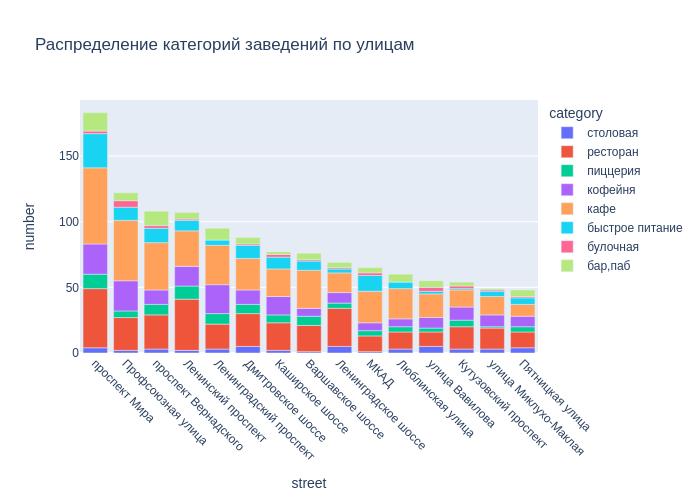

In [27]:
top_street_stat = data.query("street in @top_fifteen_street['street']").groupby(['street','category'],as_index=False).agg({'name':'count'})
top_street_stat.columns = ['street', 'category', 'number']
top_street_stat=top_street_stat.sort_values(by='street', ascending=False)

fig = px.bar(top_street_stat, x='street', y='number', color='category', title='Распределение категорий заведений по улицам')
street_stats = data.query("street in @top_fifteen_street['street']").groupby('street').agg({'name':'count'}).reset_index()                      
sorted_street = street_stats.sort_values(by='name', ascending=False)                             
fig.update_xaxes(categoryorder='array', categoryarray=sorted_street['street'], tickangle=45)

fig.show('png')

Больше всего заведений находится на проспекте Мира - 184. Далее идут Профсоюзная улица, проспект Вернадского, Ленинский и Ленинградский проспект - более 90 заведений. Вероятно, там выгодно открывать точки.

## Заведения без конкурентов на улице
Посмотрим, какие заведения единственные на улице

In [28]:
street_stat_one=street_stat.query('number==1')

In [29]:
data_street_stat_one = data.query('street in @street_stat_one["street"]')

data_street_stat_one.groupby(['category'], as_index=False).agg({'name':'count'})\
                                                          .sort_values(by='name', ascending=False)\
                                                          .reset_index(drop=True)

,category,name
0,кафе,134
1,ресторан,129
2,кофейня,78
3,"бар,паб",38
4,пиццерия,35
5,быстрое питание,18
6,столовая,15
7,булочная,11


Кафе, рестораны и кофейни чаще открывают на улицах без конкурентов.

Посмотрим, как распределены эти заведения по районам

In [30]:
data_street_stat_one.groupby(['district'], as_index=False).agg({'name':'count'})\
                                                          .sort_values(by='name', ascending=False)\
                                                          .reset_index(drop=True)

,district,name
0,Центральный административный округ,154
1,Северо-Восточный административный округ,63
2,Восточный административный округ,45
3,Северный административный округ,43
4,Западный административный округ,41
5,Южный административный округ,40
6,Юго-Восточный административный округ,35
7,Юго-Западный административный округ,21
8,Северо-Западный административный округ,16


Посмотрим на карту

In [31]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    # сохраняем URL-адрес изображения со значком торгового центра с icons8,
    # это путь к файлу на сервере icons8
    icon_url = row['url']  
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    # создаём маркер с иконкой icon и добавляем его в кластер
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

# применяем функцию для создания кластеров к каждой строке датафрейма
data.query('street in @street_stat_one["street"]').apply(create_clusters, axis=1)

# выводим карту
#m
# Save the map to an HTML file
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

Больше всего заведений без конкурентов на улице расположено в ЦАО, СВАО, ВАО и САО

## Средний чек по районам 
Посмотрим на средний счет по районам Москвы

In [32]:
bill_per_district = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
bill_per_district.sort_values(by='middle_avg_bill', ascending=False).reset_index(drop=True)

,district,middle_avg_bill
0,Западный административный округ,1000.00
1,Центральный административный округ,1000.00
2,Северо-Западный административный округ,700.00
3,Северный административный округ,650.00
4,Юго-Западный административный округ,600.00
5,Восточный административный округ,575.00
6,Северо-Восточный административный округ,500.00
7,Южный административный округ,500.00
8,Юго-Восточный административный округ,450.00


In [33]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=bill_per_district,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный чек по районам',
).add_to(m)

# выводим карту
#m
# Save the map to an HTML file
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

Не удивительно, что самые высокие цены в районах ЦАО и ЗАО, самые дорогие районы Москвы, средний чек - 1000 руб.

Самые бюджетные цены в районах СВАО, ЮАО и ЮВАО, средний чек 450-500 руб.

## Выводы

+ **Более** всех среди общепитов **распространены** *кафе, рестораны и кофейни*. **Менее** всех - *булочные, столовые и быстрое питание (fast-food)*;


+ В среднем, **больше** всего **посадочных мест** в *ресторанах, барах, пабах и кофейнях*. **Меньше** всего - в *булочных, пиццериях и кафе*;


+ Доля **несетевых** заведений - 61.9%. Доля **сетевых** в 1.6 раза **ниже**;


+ **Максимальная** доля сетевых заведений в *булочных* - 60%. Также **высокие** доли у *пиццерий и кофеен*; 


+ **Минимальная** доля сетевых заведений у *баров, пабов* - 22%. Также **низкие** доли у *столовых и кафе*;


+ Самые **популярные** сети общепита в Москве (топ-5): "*Шоколадница*", "*Домино'с Пицца*", "*Додо Пицца*", "*One Price Coffee*" и "*Яндекс Лавка*"; открыто **более** 70 точек;


+ **Средние рейтинги** по категориям заведений находятся в диапазоне 4-4.5. Больше всего **низких** оценок ставят *кафе и быстрому питанию*;


+ Имеются данные по заведениям из 9 районов Москвы. **Больше** всего заведений находится в ЦАО. **Меньше** всего - в СЗАО;


+ Самый **высокий** средний **рейтинг** у заведений в ЦАО - 4.38. У заведений СВАО и ЮВАО **минимальный** средний **рейтинг** по Москве - **ниже** 4.15. У остальных заведений в оставшихся районов рейтинг **средний**;


+ **Больше** всего заведений находится на проспекте Мира - 184. Далее идут Профсоюзная улица, проспект Вернадского, Ленинский и Ленинградский проспект - **более** 90 заведений. Вероятно, там выгодно открывать точки;


+ Больше всего заведений **без конкурентов** на улице расположено в ЦАО, СВАО, ВАО и САО;


+ Самые **высокие** цены в районах ЦАО и ЗАО, средний чек - 1000 руб;


+ Самые **бюджетные** цены в районах СВАО, ЮАО и ЮВАО, средний чек 450-500 руб.

# Кейс кофейня
Рассмотрим более детально информацию по кофейням

## Число кофеен по районам

In [34]:
coffee_stat = data.query('category == "кофейня"')
print(f'Всего кофеен в Москве {len(coffee_stat)}, что составляет {round(100*len(coffee_stat)/len(data),1)}% от общего числа заведений' )

Всего кофеен в Москве 1413, что составляет 16.8% от общего числа заведений


In [35]:
coffee_stat_district = coffee_stat.groupby('district', as_index=False).agg({'name':'count', 'middle_coffee_cup':'median'})\
                                  .sort_values(by='name',ascending=False).reset_index(drop=True)
coffee_stat_district

,district,name,middle_coffee_cup
0,Центральный административный округ,428,190.00
1,Северный административный округ,193,159.00
2,Северо-Восточный административный округ,159,162.50
3,Западный административный округ,150,189.00
4,Южный административный округ,131,150.00
5,Восточный административный округ,105,135.00
6,Юго-Западный административный округ,96,198.00
7,Юго-Восточный административный округ,89,147.50
8,Северо-Западный административный округ,62,165.00


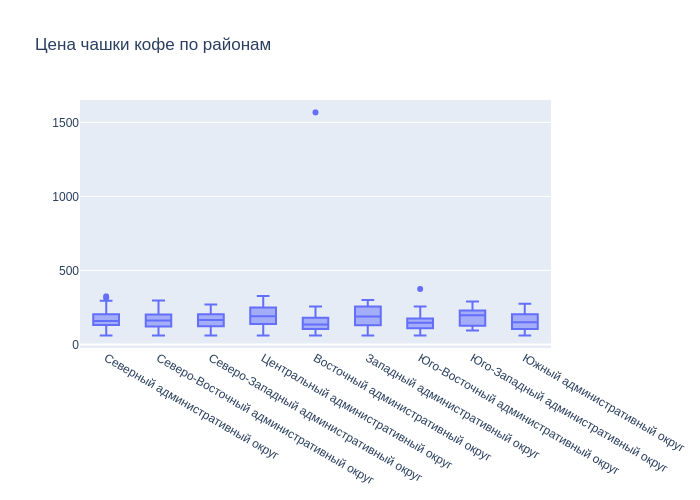

In [36]:
fig = go.Figure()
fig.add_trace(go.Box(x=coffee_stat['district'],y=coffee_stat['middle_coffee_cup']))
fig.update_layout(title='Цена чашки кофе по районам')
fig.show('png')

Больше всего кофеен расположено в ЦАО, САО и СВАО.

Самую дорогую чашку кофе вы сможете купить в ЦАО, ЗАО и ЮЗАО

In [37]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423
# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    # сохраняем URL-адрес изображения со значком торгового центра с icons8,
    # это путь к файлу на сервере icons8
    icon_url = row['url']  
    # создаём объект с собственной иконкой размером 30x30
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    # создаём маркер с иконкой icon и добавляем его в кластер
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

# применяем функцию для создания кластеров к каждой строке датафрейма
coffee_stat.apply(create_clusters, axis=1)

# выводим карту
#m
# Save the map to an HTML file
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

В ЗАО чашка кофе стоит также, как в ЦАО, однако кофеен там почти в 3 раза меньше. ЗАО - хороший район для открытия точки

## Круглосуточные кофейни

In [38]:
coffee_stat_time = coffee_stat.groupby('district',as_index=False).agg({'is_24/7':'sum', 'name':'count'})
coffee_stat_time.columns=['district','is_24/7','total']
coffee_stat_time['%'] = 100*coffee_stat_time['is_24/7']/coffee_stat_time['total']
coffee_stat_time.sort_values(by='%', ascending=False).reset_index(drop=True)

,district,is_24/7,total,%
0,Юго-Западный административный округ,7,96,7.29
1,Центральный административный округ,26,428,6.07
2,Западный административный округ,9,150,6.00
3,Восточный административный округ,5,105,4.76
4,Северо-Западный административный округ,2,62,3.23
5,Северный административный округ,5,193,2.59
6,Северо-Восточный административный округ,3,159,1.89
7,Юго-Восточный административный округ,1,89,1.12
8,Южный административный округ,1,131,0.76


В ЗАО каждая 17я кофейня работает 24/7. В ЗАО поток людей в ночное время значительно меньше, чем в ЦАО, поэтому открывать кофейню 24/7 не очень выгодно

## Рейтинг

In [39]:
rating_coffee = coffee_stat.groupby('district', as_index=False).agg({'rating':'mean'})# загружаем JSON-файл с границами округов Москвы
state_geo = '/datasets/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_coffee,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# выводим карту
#m
# Save the map to an HTML file
m.save("my_map.html")

# Display the saved map in the notebook
IFrame("my_map.html", width=700, height=500)

В ЗАО и СВАО рейтинг кофеен ниже, чем в других районах. Значит, кофейня с качественным кофе и сервисом, будет ярче выделяться на фоне конкурентов.

## Выводы
+ Всего кофеен в Москве 1413, что составляет 16.8% от общего числа заведений;


+ Больше всего кофеен расположено в ЦАО, САО и СВАО;


+ Самую дорогую чашку кофе вы сможете купить в ЦАО, ЗАО и ЮЗАО (~ 190 руб.);


+ В ЗАО чашка кофе стоит также, как в ЦАО, однако кофеен там почти в 3 раза меньше - 150;


+ В ЗАО каждая 17я кофейня работает 24/7;


+ В ЗАО и СВАО рейтинг кофеен ниже, чем в других районах.

# Рекомендации
1. ЗАО - хороший район для открытия кофейни, так как конкурентов меньше, чем в ЦАО, однако цены от ЦАО не отличаются.


2. В ЗАО низкий поток людей в ночное время, из-за большого числа спальных районов и парков, поэтому открывать кофейню 24/7, вероятно, не стоит. 


3. В ЗАО рейтинг кофеен ниже, чем в других районах. Значит, кофейня с качественным кофе и сервисом, будет ярче выделяться на фоне конкурентов.


4. Для установления цены чашки кофе, нужно определиться с ЦА: 
    +  если это студенты, то стоимость должна быть близка к медианной по району: 189 руб., а расположение у станций метро, где находятся университеты (или же просто высокий человеко-поток): такие как Университет , Юго-Западная и проспект Вернадского. 
    +  если это не студенты, то стоимость может быть близка к q3: 250 руб., а расположение вблизи офисов (или же там, где высокий человеко-поток), главный фокус на качестве кофе и сервиса.
    
    
5. Число посадочных мест определяется миссией кофейни: 
    + если подразумевается более тесное взаимодействие с клиентами - определенно стоит сделать зону для отдыха.  
    + если нет - можно обойтись без посадочных мест.


6. У кофейни есть потенциал стать сетевой, так как их доля по Москве - 50%.